## Day 31 Lecture 1 Assignment

In this assignment, we will learn about the K nearest neighbor algorithm. We will use the titanic dataset and create a model that can predict if a passenger will survive the Titanic Shipwreck or not {0, 1}.

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Columns:
- 'PassengerId': id of the passenger
- 'Survived': 
- 'Pclass': Ticket class
- 'Name': Name
- 'Sex': sex
- 'Age': Age in years
- 'SibSp': # of siblings / spouses aboard the Titanic
- 'Parch': # of parents / children aboard the Titanic
- 'Ticket': 
- 'Fare': Passenger fare
- 'Cabin': Cabin number
- 'Embarked': Port of Embarkation

In [17]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We check the distribution of variables for the column we want to predict.

In [19]:
# Calculate value counts for the Survived column

data['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

First, check for missing data and remove all columns containing missing data

In [20]:
# Calculate NA values per column

data.isnull().sum()*100/data.isnull().count()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [21]:
data.drop(columns=['Age', 'Cabin', 'Embarked'], inplace=True)

We also drop columns that are not informative and contain too many unique values(e.g. name)

In [22]:
# Calculate unique values for each column
print('\n'.join([f"Column with name '{c}' has {data[c].nunique()} unique values" for c in data.columns]))    

Column with name 'PassengerId' has 891 unique values
Column with name 'Survived' has 2 unique values
Column with name 'Pclass' has 3 unique values
Column with name 'Name' has 891 unique values
Column with name 'Sex' has 2 unique values
Column with name 'SibSp' has 7 unique values
Column with name 'Parch' has 7 unique values
Column with name 'Ticket' has 681 unique values
Column with name 'Fare' has 248 unique values


In [23]:
# Drop columns 'PassengerId', 'Name' and 'Ticket'.

data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


To use the data, we must convert all columns to numeric. Do this by replacing yes and no with 1 and 0.

In [24]:
# Use get_dummies to get a dataset with one hot encoded columns for categorical variables
# Survived should be excluded.

data = pd.concat([data,pd.get_dummies(data['Sex'], prefix='Sex', drop_first=True)],axis=1)



In [25]:
data.drop(columns='Sex', inplace=True)

In [26]:
data

,Survived,Pclass,SibSp,Parch,Fare,Sex_male
0,0,3,1,0,7.2500,1
1,1,1,1,0,71.2833,0
2,1,3,0,0,7.9250,0
3,1,1,1,0,53.1000,0
4,0,3,0,0,8.0500,1
...,...,...,...,...,...,...
886,0,2,0,0,13.0000,1
887,1,1,0,0,30.0000,0
888,0,3,1,2,23.4500,0
889,1,1,0,0,30.0000,1


In [27]:
# Let's check the new columns

data.dtypes


Survived      int64
Pclass        int64
SibSp         int64
Parch         int64
Fare        float64
Sex_male      uint8
dtype: object

Split the data into train and test. Use 20% of the data for our test subset. We will use the train_test_split function from scikit-learn for this.

In [28]:
# Split the dataset. Remember that the y arrays should include only the 'Survived' column which should be excluded from
# the X arrays
from sklearn.model_selection import train_test_split

X = data.drop(columns='Survived')
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))


The number of observations in training set is 712
The number of observations in test set is 179


Generate a KNN model with k=1 for the dataset. What is the accuracy score for the train and test subsamples?

In [29]:
from sklearn.neighbors import KNeighborsClassifier
# answer below:

neighbor = KNeighborsClassifier(n_neighbors=1)
neighbor.fit(X_train, y_train)
print('Train score: ',neighbor.score(X_train, y_train))
print('Test score: ',neighbor.score(X_test, y_test))

Train score:  0.8974719101123596
Test score:  0.6927374301675978


Would you say the model overfits? Why or why not? Put your answer in the comment below.

In [30]:
# answer below: Yes, the model overfits because it is fitting to every data point with a k=1 




In [31]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
k_list = range(1, 15, 2)

For each k value in the list created above we want to create and fit a knn instance on X_train, y_train and then make predictions both on the training set (X_train) as well as on the test set(X_test) and calculate accuracy and f1 score and append it to the corrensponding list.

In [32]:
# answer below:
for i in k_list:
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)
  accuracy_train.append(neigh.score(X_train, y_train))
  accuracy_test.append(neigh.score(X_test, y_test))
  f1_train.append(f1_score(y_train, neigh.predict(X_train)))
  f1_test.append(f1_score(y_test, neigh.predict(X_test)))


In the following plot we want to select the k that achieves the highest test score. 

Create a two plots with each of them depicting the following information:
1. Two lines, one for training accuracy and one for test accuracy for each k value.
2. Two lines, one for training F1score and one for test F1 score for each k value.

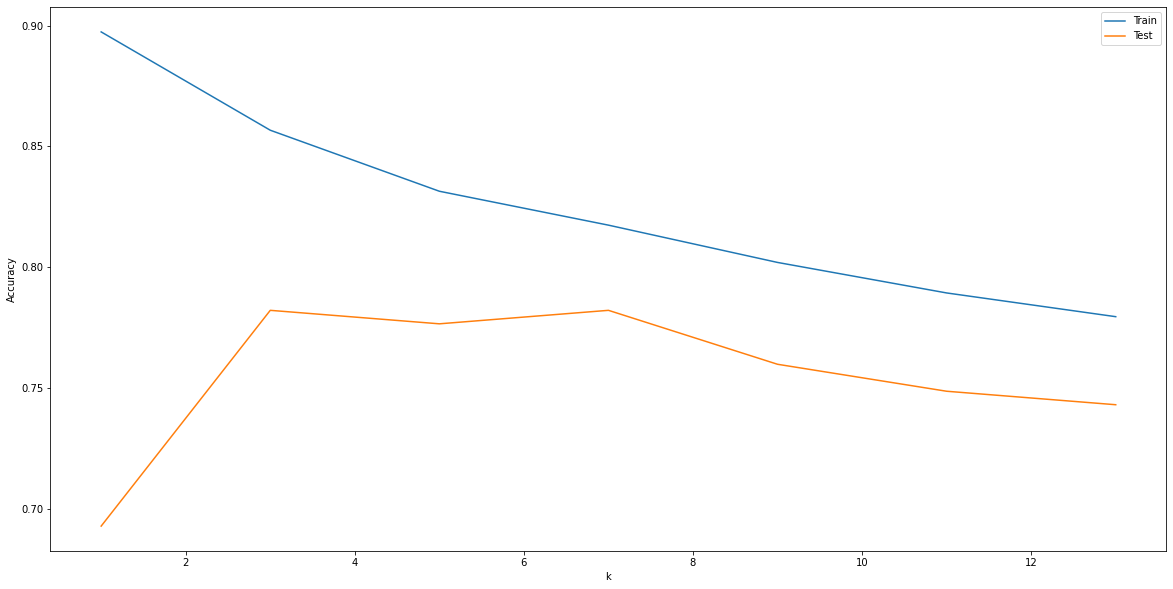

In [37]:
# answer below:

plt.figure(figsize=(20,10))
sns.lineplot(x=k_list, y=accuracy_train)
sns.lineplot(x=k_list, y=accuracy_test)
plt.legend(['Train', 'Test'])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()


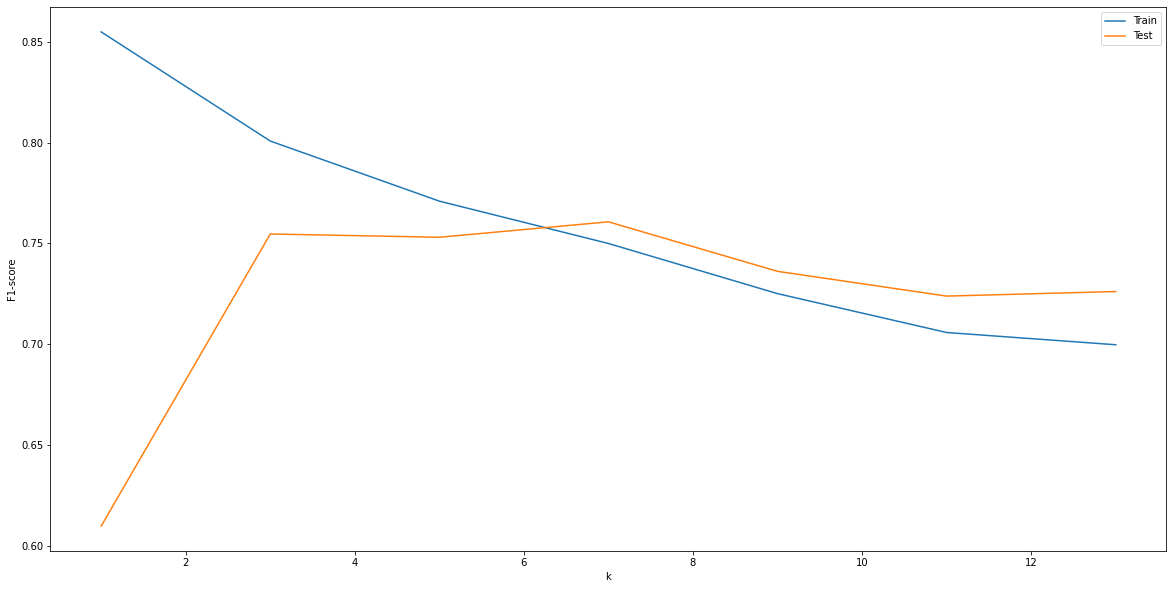

In [38]:
plt.figure(figsize=(20,10))
sns.lineplot(x=k_list, y=f1_train)
sns.lineplot(x=k_list, y=f1_test)
plt.legend(['Train', 'Test'])
plt.xlabel('k')
plt.ylabel('F1-score')
plt.show()

Please comment the results of the plots above

In [35]:
# Add your observations in comments below.
# The best value for k appears to be around 7. The F1 scores converge on each other at that value.
# Although the lines never converse for the Accuracy it still appears that around 7 is the best value to minimize the varience between the training and testing splits. 
